In [342]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

In [238]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
# Convert the dates 
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


---
<h2>Visualizing the data for getting a general idea what it has

In [14]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

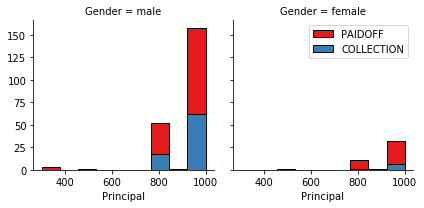

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [9]:
print(df.Principal.unique())

[1000  800  300  900  500]


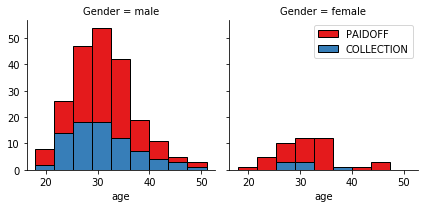

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

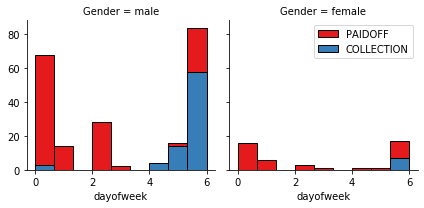

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

---
<h2> Categorical variables to numerical values

In [18]:

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [20]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [22]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [21]:
# Fix the typo "bechalor"
df.replace(to_replace = 'Bechalor', value = 'Bachelor', inplace= True)
print(df.education.unique())

['High School or Below' 'Bachelor' 'college' 'Master or Above']


In [24]:
# One hot encoding
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


---
<h2>Feature selection

In [26]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [27]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

---
<h2>Normalizing the data

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

---
<h2>KNN

In [ ]:
KNeighborsClassifier()

In [332]:
start = timeit.default_timer()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

range_for_rs_KNN = 100
range_upper_limit = 30

rs_KNN = 0
n_KNN = 1
rs__KNN = 0
n__KNN = 0
metric_KNN = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
metric__KNN = 0
accuracy_KNN = 0
jacc__KNN = 0
f1__KNN = 0
cm__KNN = 0

for rs_KNN in range(range_for_rs_KNN):
    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs_KNN)
    
    for n_KNN in range(1, range_upper_limit):
        for metric_type in metric_KNN:
            # Fitting classifier to the Training set
            classifier = KNeighborsClassifier(n_neighbors = n_KNN, metric = metric_type)
            classifier.fit(X_train, y_train)
        
        # Predicting the Test set results
        y_pred_KNN = classifier.predict(X_test)
        
        # Making the Confusion Matrix
        cm_KNN = confusion_matrix(y_test, y_pred_KNN)
        
    jacc_KNN = jaccard_score(y_test, y_pred_KNN, average='weighted')
    f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')
    #log_knn = log_loss(y_test, y_pred_knn, eps=1e-15)
    
    average_accuracy = (jacc_KNN + f1_KNN) / 2
    if average_accuracy > accuracy_KNN:
        accuracy_KNN = average_accuracy
        jacc__KNN = jacc_KNN
        metric__KNN = metric_type
        f1__KNN = f1_KNN
        cm__KNN = cm_KNN
        rs__KNN = rs_KNN
        n__KNN = n_KNN

print('Random_state of ', rs__KNN , ', metric ', metric__KNN , ' and n_neighbors of ', n__KNN ,\
      ' gave the most accurate result' )
print('Metric type: ', metric__KNN)
print('jaccard_score: ', round(jacc__KNN , 3))
print('f1_score: ', round(f1__KNN , 3) )
print('Confusion matrix: ', cm__KNN )

stop = timeit.default_timer()
print('Time: ', stop - start , ' seconds')  


Random_state of  40 , metric  minkowski  and n_neighbors of  29  gave the most accurate result
Metric type:  minkowski
jaccard_score:  0.744
f1_score:  0.826
Confusion matrix:  [[ 3  9]
 [ 1 57]]
Time:  21.32175477700366  seconds


In [363]:
k-fold = 


# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier.predict(X_test)

# Making the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

jacc_knn = jaccard_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
#log_knn = log_loss(y_test, y_pred_knn, eps=1e-15)


print('jaccard_score: ', jacc_knn )
print('f1_score: ', f1_knn )
print('Confusion matrix: ', cm_knn )

jaccard_score:  0.6979591836734693
f1_score:  0.7694038245219347
Confusion matrix:  [[ 0 10]
 [ 3 57]]


In [390]:
# testing with k-fold cross_val
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

kf = KFold(n_splits = 10, shuffle = False, random_state = 0)
rf_reg = KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski')

scores = []
for i in range(5):
    result_X = next(kf.split(X), None)
    result_y = next(kf.split(y), None)
    x_train = df.iloc[result_X[0]]
    x_test = df.iloc[result_X[1]]
    y_train = y.iloc[result_y[0]]
    y_test = y.iloc[result_y[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier.predict(X_test)

# Making the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean()) 
print(accuracies)

jacc_knn = jaccard_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
#log_knn = log_loss(y_test, y_pred_knn, eps=1e-15)


print('jaccard_score: ', jacc_knn )
print('f1_score: ', f1_knn )
print('Confusion matrix: ', cm_knn )

0.7103174603174603
[0.60714286 0.67857143 0.71428571 0.75       0.75       0.71428571
 0.7037037  0.74074074 0.66666667 0.77777778]
jaccard_score:  0.6979591836734693
f1_score:  0.7694038245219347
Confusion matrix:  [[ 0 10]
 [ 3 57]]


In [415]:
# testing with k-fold cross_val
kf = KFold(n_splits = 10, shuffle = False, random_state = 0)
rf_reg = KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski')

scores = []
for i in range(5):
    result_X = next(kf.split(X), None)
    result_y = next(kf.split(y), None)
    x_train = df.iloc[result_X[0]]
    x_test = df.iloc[result_X[1]]
    y_train = y.iloc[result_y[0]]
    y_test = y.iloc[result_y[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [414]:

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

x_training = []
x_testing = []
# data sample
datas = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(n_splits = 10, shuffle = False, random_state = 1)
# enumerate splits
for train, test in kfold.split(datas):
	print('train: %s, test: %s' % (datas[train], datas[test]))
    x_training.append(datas[train])
    x_testing.append(datas[test])
x_training
x_testing

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [393]:
from sklearn.model_selection import KFold # import KFold
X2 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y2 = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X2) # returns the number of splitting iterations in the 
                   # cross-validatorprint(kf) KFold(n_splits=2, random_state=None, shuffle=False)


2

---
<h2> Decision Tree

In [345]:
start = timeit.default_timer()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

range_for_rs_DT = 50

rs_DT = 0
rs_2_DT = 1
rs__DT = 0
criterion_list = ['entropy' , 'gini']
criterion__DT = 0
accuracy_DT = 0
jacc__DT = 0
f1__DT = 0
cm__DT = 0


for rs_DT in range(range_for_rs_DT):
    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs_DT)
    
    # Feature Scaling
    # Not mandatory, but makes the visualization process faster to have feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    for criterion_DT in criterion_list:
        ## Fitting classifier to the Training set
        classifier = DecisionTreeClassifier(criterion = criterion_DT, random_state=1)
        classifier.fit(X_train, y_train)
        
    # Predicting the Test set results
    y_pred_DT = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm_DT = confusion_matrix(y_test, y_pred_DT)

        
    jacc_DT = jaccard_score(y_test, y_pred_DT, average='weighted')
    f1_DT = f1_score(y_test, y_pred_DT, average='weighted')
    #log_knn = log_loss(y_test, y_pred_knn, eps=1e-15)
    
    average_accuracy = (jacc_DT + f1_DT) / 2
    if average_accuracy > accuracy_DT:
        accuracy_DT = average_accuracy
        jacc__DT = jacc_DT
        f1__DT = f1_DT
        cm__DT = cm_DT
        rs__DT = rs_DT
        criterion__DT = criterion_DT

print('Random_state (train_test_split) of ', rs__DT ,\
      ' and criterion ', criterion__DT , ' gave the most accurate result' )
print('Criterion: ', criterion__DT)
print('jaccard_score: ', round(jacc__DT , 3) )
print('f1_score: ', round(f1__DT , 3) )
print('Confusion matrix: ', cm__DT )



Random_state (train_test_split) of  40 , random_state (classifier fit) of  29  and criterion  gini  gave the most accurate result
Criterion:  gini
jaccard_score:  0.744
f1_score:  0.826
Confusion matrix:  [[ 3  9]
 [ 1 57]]


In [370]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(criterion = 'gini', random_state=29 ).fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier.predict(X_test)

# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

jacc_dt = jaccard_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')


print('jaccard_score: ', jacc_dt )
print('f1_score: ', f1_dt )
print('Confusion matrix: ', cm_dt )

jaccard_score:  0.7444644907331475
f1_score:  0.8260368663594471
Confusion matrix:  [[ 3  9]
 [ 1 57]]


---
<h2> Support Vector Machine

In [292]:
start = timeit.default_timer()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import timeit

range_for_rs_SVM = 100

rs_SVM = 0
rs__SVM = 0
kernel_SVM = ['linear', 'poly', 'rbf', 'sigmoid']
kernel__SVM = 0
accuracy_SVM = 0
jacc__SVM = 0
f1__SVM = 0
cm__SVM = 0

for rs_SVM in range(range_for_rs_SVM):
    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs_SVM)
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    for kernel_type in kernel_SVM:
        # Fitting SVM to the Training set
        classifier = SVC(kernel = kernel_type, random_state = 1)
        classifier.fit(X_train, y_train)
        
    # Predicting the Test set results
    y_pred_SVM = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm_SVM = confusion_matrix(y_test, y_pred_SVM)

        
    jacc_SVM = jaccard_score(y_test, y_pred_SVM, average='weighted')
    f1_SVM = f1_score(y_test, y_pred_SVM, average='weighted')
    #log_knn = log_loss(y_test, y_pred_knn, eps=1e-15)
    
    average_accuracy = (jacc_SVM + f1_SVM) / 2
    if average_accuracy > accuracy_SVM:
        accuracy_SVM = average_accuracy
        jacc__SVM = jacc_SVM
        f1__SVM = f1_SVM
        cm__SVM = cm_SVM
        rs__SVM = rs_SVM
        kernel__SVM = kernel_type

print('Random_state (train_test_split) of ', rs__SVM , \
      'and kernel type ', kernel__SVM , ' gave the most accurate result' )
print('jaccard_score: ', round(jacc__SVM , 3) )
print('f1_score: ', round(f1__SVM , 3) )
print('Confusion matrix: ', cm__SVM )

stop = timeit.default_timer()
print('Time: ', round(stop - start, 2), ' seconds')  

Random_state (train_test_split) of  40 , random_state (classifier fit) of  99 and kernel type  sigmoid  gave the most accurate result
jaccard_score:  0.793
f1_score:  0.869
Confusion matrix:  [[ 5  7]
 [ 1 57]]
Time:  133.38  seconds


In [379]:

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
SVC(kernel = 'sigmoid', random_state = 0).fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier.predict(X_test)

# Making the Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)


jacc_svm = jaccard_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
#log_svm = log_loss(y_test, y_pred_knn, eps=1e-15)


print('jaccard_score: ', jacc_svm )
print('f1_score: ', f1_svm )
print('Confusion matrix: ', cm_svm )

jaccard_score:  0.6577712939064077
f1_score:  0.7629760070438036
Confusion matrix:  [[ 3  9]
 [ 7 51]]


---
<h2> Logistic regression

In [344]:
start = timeit.default_timer()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

range_for_rs_LR = 50

rs_LR = 0
rs__LR = 0
accuracy_LR = 0
jacc__LR = 0
f1__LR = 0
cm__LR = 0
Log__LR = 0

for rs_LR in range(range_for_rs_LR):
    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs_LR)
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Fitting SVM to the Training set
    classifier = LogisticRegression(random_state = 1)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred_LR = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm_LR = confusion_matrix(y_test, y_pred_LR)
        
    jacc_LR = jaccard_score(y_test, y_pred_LR, average='weighted')
    f1_LR = f1_score(y_test, y_pred_LR, average='weighted')
    
    average_accuracy = (jacc_LR + f1_LR) / 2
    if average_accuracy > accuracy_LR:
        accuracy_LR = average_accuracy
        jacc__LR = jacc_LR
        f1__LR = f1_LR
        cm__LR = cm_LR
        rs__LR = rs_LR
        LR_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
        y_pred_prob = LR_reg.predict_proba(X_test)
        Log__LR = log_loss(y_test, y_pred_prob)

print('Random_state of ', rs__LR , ' gave the most accurate result' )
print('jaccard_score: ', round(jacc__LR , 3) )
print('f1_score: ', round(f1__LR , 3) )
print('Log loss: ', round(Log__LR , 3) )
print('Confusion matrix: ', cm__LR )

stop = timeit.default_timer()
print('Time: ', stop - start , ' seconds')  



Random_state of  40  and n_neighbors of  29  gave the most accurate result
jaccard_score:  0.744
f1_score:  0.826
Log loss:  0.524
Confusion matrix:  [[ 3  9]
 [ 1 57]]
Time:  7.012406513997121  seconds


In [389]:
# Ensuring the algorithm works: 

# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Fitting SVM to the Training set
from sklearn.linear_model import LogisticRegression
LogisticRegression(random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier.predict(X_test)

# Making the Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

jacc_lr = jaccard_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
#log_knn = log_loss(y_test, y_pred_knn, eps=1e-15)


print('jaccard_score: ', jacc_lr )
print('f1_score: ', f1_lr )
print('Confusion matrix: ', cm_lr )

jaccard_score:  0.7444644907331475
f1_score:  0.8260368663594471
Confusion matrix:  [[ 3  9]
 [ 1 57]]


---
<h2> Model evaluation

In [143]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [343]:
testing = pd.DataFrame([[jacc__KNN, f1__KNN] , [jacc__DT, f1__DT], [jacc__SVM , f1__SVM], [jacc__LR , f1__LR, Log__LR]], \
                       ['KNN' , 'Decision tree', 'SVM', 'Logistic reg'], columns=['Jaccard', 'f1', 'Log loss'])
testing

,Jaccard,f1,Log loss
KNN,0.744464,0.826037,NaN
Decision tree,0.792527,0.869477,NaN
SVM,0.792527,0.869477,NaN
Logistic reg,0.744464,0.826037,0.524164
